In [1]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs

In [2]:
#areacello
fn_aco = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Ofx/areacello/gn/areacello_Ofx_EC-Earth3_historical_r1i1p1f1_gn.nc'
aco = xr.open_dataset(fn_aco)

#CMIP6
#historical
fn_sicrec_sd = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/SImon/siconc/gn/*.nc'
sic_rec_sd = xr.open_mfdataset(fn_sicrec_sd)

#SSP585
fn_sicfut = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/SImon/siconc/gn/*.nc'
sic_fut_sd = xr.open_mfdataset(fn_sicfut)

#5icu runs
#historical
fn_sic_5icu_hist ='/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/SImon/siconc/gn/v20230720/*.nc'
sic_5icu_hist = xr.open_mfdataset(fn_sic_5icu_hist)

#SSP585
fn_sic_5icu_585 ='/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/SImon/siconc/gn/v20230720/*.nc'
sic_5icu_585 = xr.open_mfdataset(fn_sic_5icu_585)

#lcic runs
#historical
fn_sic_lcic_hist ='/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/SImon/siconc/gn/v20230713/*.nc'
sic_lcic_hist = xr.open_mfdataset(fn_sic_lcic_hist)

#SSP585
fn_sic_lcic_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/SImon/siconc/gn/v20230714/*.nc'
sic_lcic_585 = xr.open_mfdataset(fn_sic_lcic_585)

In [3]:
sie_rec_tot_sd = ((sic_rec_sd.isel(j=range(0,75)).siconc>0.15)*(aco.areacello/1e6/1e6)).sum(['i','j'])
sie_fut_tot_sd = ((sic_fut_sd.isel(j=range(0,75)).siconc>0.15)*(aco.areacello/1e6/1e6)).sum(['i','j'])

sie_tot_lcic_hist = ((sic_lcic_hist.isel(j=range(0,75)).siconc>0.15)*(aco.areacello/1e6/1e6)).sum(['i','j'])
sie_tot_lcic_585 = ((sic_lcic_585.isel(j=range(0,75)).siconc>0.15)*(aco.areacello/1e6/1e6)).sum(['i','j'])

sie_tot_5icu_hist = ((sic_5icu_hist.isel(j=range(0,75)).siconc>0.15)*(aco.areacello/1e6/1e6)).sum(['i','j'])
sie_tot_5icu_585 = ((sic_5icu_585.isel(j=range(0,75)).siconc>0.15)*(aco.areacello/1e6/1e6)).sum(['i','j'])

In [4]:
sie_rec_tot_sd

<xarray.DataArray (time: 1980)>
dask.array<sum-aggregate, shape=(1980,), dtype=float32, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    type     |S7 b'sea_ice'

In [5]:
sie_tot_sd = xr.concat([sie_rec_tot_sd, sie_fut_tot_sd], dim='time')
sie_tot_lcic = xr.concat([sie_tot_lcic_hist, sie_tot_lcic_585], dim='time')


start_year = 1851
end_year = 1883
reference_time_range = pd.date_range(start=str(start_year), end=str(end_year), freq='MS')  # 'MS' for monthly start frequency

# Step 2: Create a placeholder DataArray for a specific variable
# You can use NaN or other placeholder values for missing data
placeholder_data = [12.5] * len(reference_time_range)  # Placeholder values for a specific variable

# Create the DataArray
placeholder_da = xr.DataArray(placeholder_data, coords={'time': reference_time_range}, dims=['time'])

# Explicitly rechunk the placeholder DataArray
# For example, you can set a fixed chunk size, e.g., 12 months per chunk
placeholder_da = placeholder_da.chunk({'time': 12})

# Step 3: Combine the original DataArray and the placeholder DataArray
# Assuming 'original_da' is your original DataArray
combined_da = xr.concat([placeholder_da, sie_tot_5icu_hist], dim='time')

sie_tot_5icu = xr.concat([combined_da, sie_tot_5icu_585], dim='time')

sie_tot_5icu

<xarray.DataArray (time: 2989)>
dask.array<concatenate, shape=(2989,), dtype=float64, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
    type     |S7 b'sea_ice'
  * time     (time) datetime64[ns] 1851-01-01 1851-02-01 ... 2098-12-16T12:00:00

In [6]:
mg_sie_tot_sd = sie_tot_sd.groupby('time.month')
mg_sie_tot_lcic = sie_tot_lcic.groupby('time.month')
mg_sie_tot_5icu = sie_tot_5icu.groupby('time.month')

mg_sie_tot_sd

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

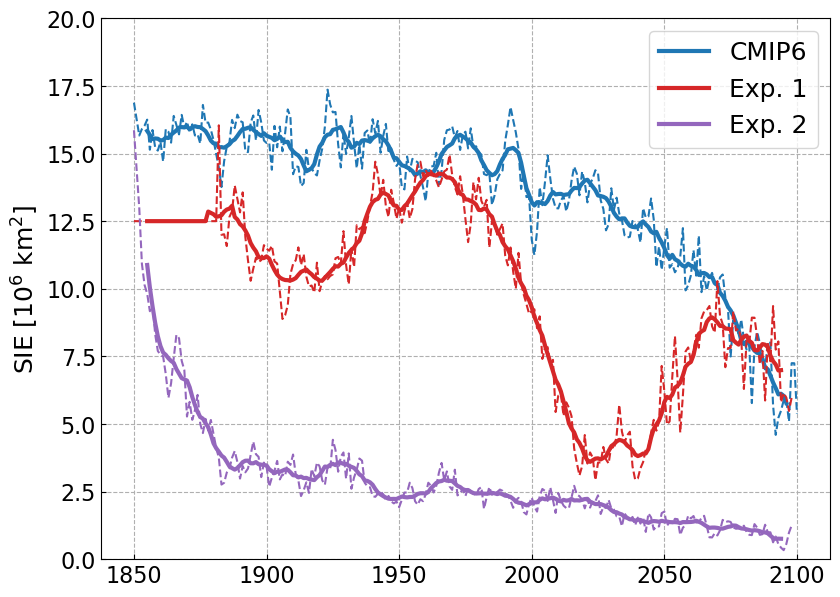

In [27]:
fig, ax = plt.subplots(figsize=[8,6])
#fig.suptitle('Total september sea ice extent in AA over time', fontsize = 16)
plt.plot(mg_sie_tot_sd[9], linestyle = 'dashed', color = 'tab:blue')
plt.plot(mg_sie_tot_sd[9].rolling(time = 10, center = True).mean(), linewidth = 3, color = 'tab:blue', label = 'CMIP6')
plt.plot(mg_sie_tot_5icu[9], linestyle = 'dashed', color = 'tab:red')
plt.plot(mg_sie_tot_5icu[9].rolling(time = 10, center = True).mean(), linewidth = 3, color = 'tab:red', label = 'Exp. 1')
plt.plot(mg_sie_tot_lcic[9], linestyle = 'dashed', color = 'tab:purple')
plt.plot(mg_sie_tot_lcic[9].rolling(time = 10, center = True).mean(), linewidth = 3, color = 'tab:purple', label = 'Exp. 2')
xtick_locs= np.arange(0, 250+1, 50)
tick_years= np.arange(1850, 2100 + 1, 50)
plt.xticks(xtick_locs, tick_years)
plt.ylim(0,20)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.tick_params(direction = 'in', labelsize = 16)
plt.grid(linestyle = '--')
plt.ylabel('SIE [$10^6$ $\mathregular{km}^2$]', fontsize = 18)
plt.legend(fontsize = 18)

plt.show()

Seasonal Cycles

In [8]:
sie_tot_sd

<xarray.DataArray (time: 3012)>
dask.array<concatenate, shape=(3012,), dtype=float32, chunksize=(12,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2100-12-16T12:00:00
    type     |S7 b'sea_ice'

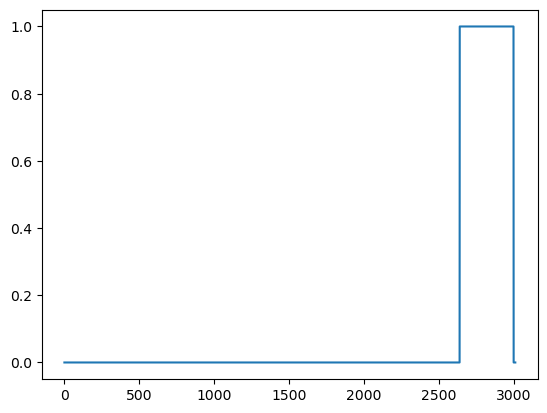

In [9]:
selected_years = [range(2070,2100,1)]
year_mask = sie_tot_sd['time.year'].isin(selected_years)
subset_sietot = sie_tot_sd.sel(time=year_mask)
monthly_mean = subset_sietot.groupby('time.month').mean(dim='time')
#subset_sietot = subset_sietot.chunk({'time': -1})
monthly_std = subset_sietot.groupby('time.month').std(dim='time')
monthly_mean.to_netcdf("/usr/people/ijzerman/GradProject/DataFiles/timeseries/SIEmonthlymeanfut.nc")
monthly_std.to_netcdf("/usr/people/ijzerman/GradProject/DataFiles/timeseries/SIEmonthlystdfut.nc")

plt.plot(year_mask.values)

In [10]:
#past 1904-1934
monthly_mean_past = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/timeseries/SIEmonthlymeanpast.nc')
monthly_std_past = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/timeseries/SIEmonthlystdpast.nc')
#recent 1984-2014
monthly_mean_rec = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/timeseries/SIEmonthlymeanrec.nc')
monthly_std_rec = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/timeseries/SIEmonthlystdrec.nc')
#future 2070-2100
monthly_mean_fut = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/timeseries/SIEmonthlymeanfut.nc')
monthly_std_fut = xr.open_dataarray('/usr/people/ijzerman/GradProject/DataFiles/timeseries/SIEmonthlystdfut.nc')

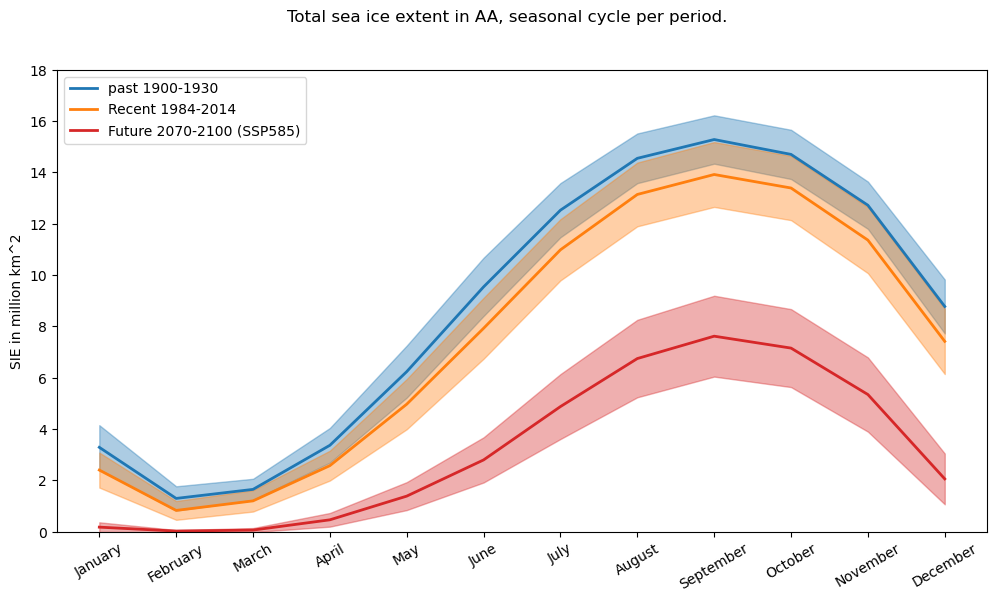

In [11]:
fig = plt.figure(figsize=[12,6])
fig.suptitle('Total sea ice extent in AA, seasonal cycle per period.')
plt.plot(monthly_mean_past.month, monthly_mean_past, color = 'tab:blue', linewidth = 2, label = 'past 1900-1930')
plt.fill_between(monthly_mean_past.month, monthly_mean_past+monthly_std_past, monthly_mean_past-monthly_std_past, color = 'tab:blue', alpha = 0.37)
plt.plot(monthly_mean_rec.month, monthly_mean_rec, color = 'tab:orange', linewidth = 2, label = 'Recent 1984-2014')
plt.fill_between(monthly_mean_rec.month, monthly_mean_rec+monthly_std_rec, monthly_mean_rec-monthly_std_rec, color = 'tab:orange', alpha = 0.37)

plt.plot(monthly_mean_fut.month, monthly_mean_fut, color = 'tab:red', linewidth = 2, label = 'Future 2070-2100 (SSP585)')
plt.fill_between(monthly_mean_fut.month, monthly_mean_fut+monthly_std_fut, monthly_mean_fut-monthly_std_fut, color = 'tab:red', alpha = 0.37)
tick_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.xticks(np.arange(1, 13, 1), tick_months, rotation = 30)
plt.ylim(0,18)
plt.ylabel('SIE in million km^2')
plt.legend(loc ='upper left')
plt.show()


Freshwater export


In [12]:
# standard run historical
# historical mrro
fn_mrro_sd_hist = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Lmon/mrro/gr/*.nc'
mrro_sd_hist = xr.open_mfdataset(fn_mrro_sd_hist)

# historical evspsbl
fn_evspsbl_sd_hist = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/evspsbl/gr/*.nc'
evspsbl_sd_hist = xr.open_mfdataset(fn_evspsbl_sd_hist)

# historical pr
fn_pr_sd_hist = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/pr/gr/*.nc'
pr_sd_hist = xr.open_mfdataset(fn_pr_sd_hist)

# historical friver
fn_friver_sd_hist = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Omon/friver/gn/*.nc'
friver_sd_hist = xr.open_mfdataset(fn_friver_sd_hist)

#####################################

#standard run ssp585
# ssp585 mrro
fn_mrro_sd_585 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Lmon/mrro/gr/*.nc'
mrro_sd_585 = xr.open_mfdataset(fn_mrro_sd_585)

# ssp585 evspsbl
fn_evspsbl_sd_585 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/evspsbl/gr/*.nc'
evspsbl_sd_585 = xr.open_mfdataset(fn_evspsbl_sd_585)

# ssp585 pr
fn_pr_sd_585 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/pr/gr/*.nc'
pr_sd_585 = xr.open_mfdataset(fn_pr_sd_585)

# ssp585 friver
fn_friver_sd_585 = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Omon/friver/gn/*.nc'
friver_sd_585 = xr.open_mfdataset(fn_friver_sd_585)

#####################################

# freshwater forcing LRF run (lcic) historical
# evspsbl historical
fn_evspsbl_lcic_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/evspsbl/gr/v20230731/*.nc'
evspsbl_lcic_hist = xr.open_mfdataset(fn_evspsbl_lcic_hist)

# pr historical
fn_pr_lcic_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/pr/gr/v20230721/*.nc'
pr_lcic_hist = xr.open_mfdataset(fn_pr_lcic_hist)

# freshwater forcing LRF run (lcic) ssp585
# evspsbl ssp585
fn_evspsbl_lcic_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/evspsbl/gr/v20230731/*.nc'
evspsbl_lcic_585 = xr.open_mfdataset(fn_evspsbl_lcic_585)

# pr ssp585
fn_pr_lcic_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/pr/gr/v20230731/*.nc'
pr_lcic_585 = xr.open_mfdataset(fn_pr_lcic_585)

# freshwater forcing 5icu run
# evspsbl hist
fn_evspsbl_5icu_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/evspsbl/gr/v20230719/*.nc'
evspsbl_5icu_hist = xr.open_mfdataset(fn_evspsbl_5icu_hist)

# pr hist
fn_pr_5icu_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/pr/gr/v20230719/*.nc'
pr_5icu_hist = xr.open_mfdataset(fn_pr_5icu_hist)

# evspsbl ssp585
fn_evspsbl_5icu_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/evspsbl/gr/v20230720/*.nc'
evspsbl_5icu_585 = xr.open_mfdataset(fn_evspsbl_5icu_585)

# pr 585
fn_pr_5icu_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/pr/gr/v20230720/*.nc'
pr_5icu_585 = xr.open_mfdataset(fn_pr_5icu_585)

In [13]:
#areacella
fn_aca = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/fx/areacella/gr/areacella_fx_EC-Earth3_historical_r1i1p1f1_gr.nc'
aca = xr.open_dataset(fn_aca)

#sftlf
fn_sftlf = '/usr/people/ijzerman/GradProject/DataFiles/sftlf.nc'
sftlf = xr.open_dataset(fn_sftlf)

#sftof
fn_sftof = '/usr/people/ijzerman/GradProject/DataFiles/sftof.nc'
sftof = xr.open_dataset(fn_sftof)

In [14]:
friver_sd_hist_processed = ((friver_sd_hist.friver*aco.areacello).isel(j=range(0,60,1))).sum(['i','j'])*(31536000/1e12) #conversion to Gt/y
friver_sd_585_processed = ((friver_sd_585.friver*aco.areacello).isel(j=range(0,60,1))).sum(['i','j'])*(31536000/1e12)

In [15]:
friver_sd_hist

<xarray.Dataset>
Dimensions:             (time: 1980, bnds: 2, j: 292, i: 362, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12...
  * j                   (j) int32 1 2 3 4 5 6 7 ... 286 287 288 289 290 291 292
  * i                   (i) int32 1 2 3 4 5 6 7 ... 356 357 358 359 360 361 362
    latitude            (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
    longitude           (j, i) float64 dask.array<chunksize=(292, 362), meta=np.ndarray>
Dimensions without coordinates: bnds, vertices
Data variables:
    time_bnds           (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    vertices_latitude   (time, j, i, vertices) float64 dask.array<chunksize=(12, 292, 362, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float64 dask.array<chunksize=(12, 292, 362, 4), meta=np.ndarray>
    friver              (time, j, i) float32 dask.array<chunksize=(12, 292, 362), meta=np.ndarray>
Attributes: (12/48)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    branch_time:                        0.0
    comment:                            Production: Thomas Reerink at KNMI
    contact:                            cmip6-data@ec-earth.org
    ...                                 ...
    cmor_version:                       3.5.0
    tracking_id:                        hdl:21.14100/b67fd26c-e6ba-450a-b7e9-...
    branch_time_in_child:               0.0D
    branch_time_in_parent:              149749.0D
    history:                            2019-09-26T09:10:49Z ; CMOR rewrote d...
    latest_applied_cmor_fixer_version:  v3.0

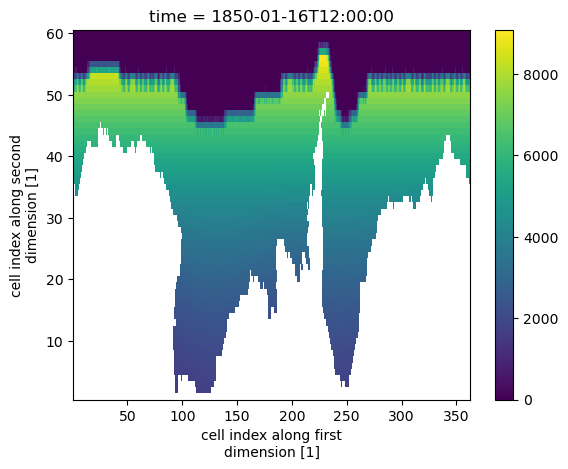

In [16]:
((friver_sd_hist.friver*aco.areacello).isel(j=range(0,60,1))).isel(time=0).plot()

In [17]:
mrro_sd_hist_processed = ((mrro_sd_hist.mrro*aca.areacella).isel(lat = range(0,45,1))).sum(['lat','lon'])*(31536000/1e12)
mrro_sd_585_processed = ((mrro_sd_585.mrro*aca.areacella).isel(lat = range(0,45,1))).sum(['lat','lon'])*(31536000/1e12)


In [18]:
#smb = surface mass balance
smb_sd_hist = ((((pr_sd_hist.pr - evspsbl_sd_hist.evspsbl)*(sftlf.sftlf/100))*aca.areacella).isel(lat=range(0,48,1)))*(31536000/1e12)
smb_sd_585 = ((((pr_sd_585.pr - evspsbl_sd_585.evspsbl)*(sftlf.sftlf/100))*aca.areacella).isel(lat=range(0,48,1)))*(31536000/1e12)
smb_lcic_hist = ((((pr_lcic_hist.pr - evspsbl_lcic_hist.evspsbl)*(sftlf.sftlf/100))*aca.areacella).isel(lat=range(0,48,1)))*(31536000/1e12)
smb_lcic_585 = ((((pr_lcic_585.pr - evspsbl_lcic_585.evspsbl)*(sftlf.sftlf/100))*aca.areacella).isel(lat=range(0,48,1)))*(31536000/1e12)
smb_5icu_hist = ((((pr_5icu_hist.pr - evspsbl_5icu_hist.evspsbl)*(sftlf.sftlf/100))*aca.areacella).isel(lat=range(0,48,1)))*(31536000/1e12)
smb_5icu_585 = ((((pr_5icu_585.pr - evspsbl_5icu_585.evspsbl)*(sftlf.sftlf/100))*aca.areacella).isel(lat=range(0,48,1)))*(31536000/1e12)

aca.areacella

<xarray.DataArray 'areacella' (lat: 256, lon: 512)>
[131072 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Attributes:
    standard_name:  cell_area
    long_name:      Grid-Cell Area for Atmospheric Grid Variables
    comment:        For atmospheres with more than 1 mesh (e.g., staggered gr...
    units:          m2
    cell_methods:   area: sum
    history:        2021-03-23T20:42:31Z altered by CMOR: Converted type from...

In [19]:
# smb_sd_hist_area = (smb_sd_hist*aca.areacella).isel(lat=range(0,48,1))
# smb_sd_585_area = (smb_sd_585*aca.areacella).isel(lat=range(0,48,1))
# smb_lcic_hist_area = (smb_lcic_hist*aca.areacella).isel(lat=range(0,48,1))
# smb_lcic_585_area = (smb_lcic_585*aca.areacella).isel(lat=range(0,48,1))
# smb_5icu_hist_area = (smb_5icu_hist*aca.areacella).isel(lat=range(0,48,1))
# smb_5icu_585_area = (smb_5icu_585*aca.areacella).isel(lat=range(0,48,1))

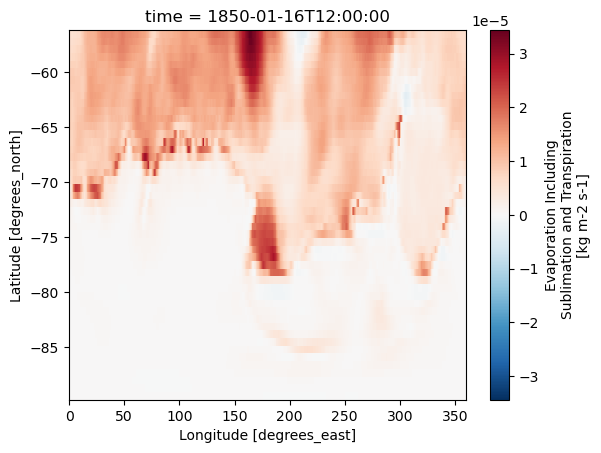

In [20]:
evspsbl_sd_hist.evspsbl.isel({'time':0,'lat':range(0,48,1)}).plot()

In [21]:
spy = 3600*24*365

In [22]:
gy_smb_sd_hist = smb_sd_hist.groupby('time.year')
smb_yearavg_sd_hist = gy_smb_sd_hist.sum('time')

gy_smb_sd_585 = smb_sd_585.groupby('time.year')
smb_yearavg_sd_585 = gy_smb_sd_585.sum('time')

gy_smb_5icu_hist = smb_5icu_hist.groupby('time.year')
smb_yearavg_5icu_hist = gy_smb_5icu_hist.sum('time')

gy_smb_5icu_585 = smb_5icu_585.groupby('time.year')
smb_yearavg_5icu_585 = gy_smb_5icu_585.sum('time')

gy_smb_lcic_hist = smb_lcic_hist.groupby('time.year')
smb_yearavg_lcic_hist = gy_smb_lcic_hist.sum('time')

gy_smb_lcic_585 = smb_lcic_585.groupby('time.year')
smb_yearavg_lcic_585 = gy_smb_lcic_585.sum('time')


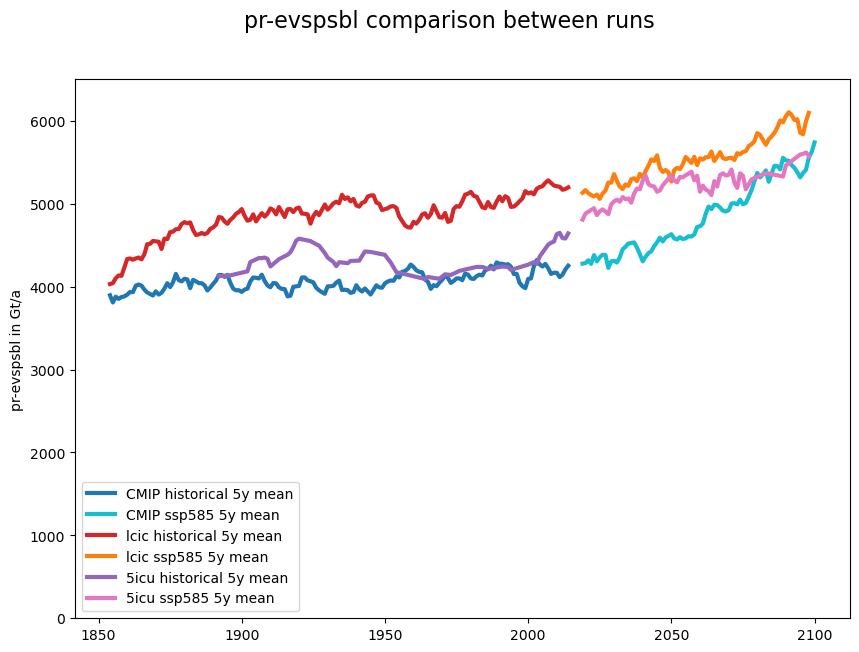

In [23]:
fig = plt.figure(figsize=[10,7])
fig.suptitle('pr-evspsbl comparison between runs', fontsize = 16)
yearmean = 5
lw = 3
#CMIP version historical
# plt.plot(smb_yearavg_sd_hist.year, smb_yearavg_sd_hist.sum(['lat','lon']), 
#         linestyle = 'dotted', color = 'tab:blue', label = 'CMIP historical')
plt.plot(smb_yearavg_sd_hist.year, smb_yearavg_sd_hist.sum(['lat','lon']).rolling(year = yearmean).mean(), 
         linewidth = lw, color = 'tab:blue', label = 'CMIP historical 5y mean')

# plt.plot(smb_yearavg_sd_585.year, smb_yearavg_sd_585.sum(['lat','lon']), 
#         linestyle = 'dotted', color = 'tab:cyan', label = 'CMIP ssp585')
plt.plot(smb_yearavg_sd_585.year, smb_yearavg_sd_585.sum(['lat','lon']).rolling(year = yearmean).mean(), 
         linewidth = lw, color = 'tab:cyan', label = 'CMIP ssp585 5y mean')

# plt.plot(smb_yearavg_lcic_hist.year, smb_yearavg_lcic_hist.sum(['lat','lon']), 
#         linestyle = 'dotted', color = 'tab:red', label = 'lcic historical')
plt.plot(smb_yearavg_lcic_hist.year, smb_yearavg_lcic_hist.sum(['lat','lon']).rolling(year = yearmean).mean(), 
         linewidth = lw, color = 'tab:red', label = 'lcic historical 5y mean')

# plt.plot(smb_yearavg_lcic_585.year, smb_yearavg_lcic_585.sum(['lat','lon']), 
#         linestyle = 'dotted', color = 'tab:orange', label = 'lcic ssp585')
plt.plot(smb_yearavg_lcic_585.year, smb_yearavg_lcic_585.sum(['lat','lon']).rolling(year = yearmean).mean(), 
         linewidth = lw, color = 'tab:orange', label = 'lcic ssp585 5y mean')

# plt.plot(smb_yearavg_5icu_hist.year, smb_yearavg_5icu_hist.sum(['lat','lon']), 
#         linestyle = 'dotted', color = 'tab:purple', label = '5icu historical')
plt.plot(smb_yearavg_5icu_hist.year, smb_yearavg_5icu_hist.sum(['lat','lon']).rolling(year = yearmean).mean(), 
         linewidth = lw, color = 'tab:purple', label = '5icu historical 5y mean')

# plt.plot(smb_yearavg_5icu_585.year, smb_yearavg_5icu_585.sum(['lat','lon']), 
#          linestyle = 'dotted', color = 'tab:pink', label = '5icu ssp585')
plt.plot(smb_yearavg_5icu_585.year, smb_yearavg_5icu_585.sum(['lat','lon']).rolling(year = yearmean).mean(), 
         linewidth = lw, color = 'tab:pink', label = '5icu ssp585 5y mean')
# #plt.plot(smb_sd_585_area.time, smb_sd_585_area.sum(['lat','lon']), linestyle = 'dotted', color = 'tab:orange', label = 'pr-evspsbl 1850-2100')
# plt.plot(smb_yearavg_sd_585.year, smb_yearavg_sd_585.sum(['lat','lon']).rolling(time = 12*yearmean).mean(), linewidth = 2, color = 'tab:orange', label = 'pr-evspsbl 3y mean ScenarioMIP SSP585')

# #plt.plot(smb_lcic_hist_area.time, smb_lcic_hist_area.sum(['lat','lon']), linestyle = 'dotted', color = 'tab:green', label = 'pr-evspsbl 1850-2100')
# plt.plot(smb_lcic_hist.time, smb_lcic_hist.sum(['lat','lon']).rolling(time = 12*yearmean).mean(), linewidth = 2, color = 'tab:green', label = 'pr-evspsbl 3y mean lcic historical')

# #plt.plot(smb_lcic_585_area.time, smb_lcic_585_area.sum(['lat','lon']), linestyle = 'dotted', color = 'tab:red', label = 'pr-evspsbl 1850-2100')
# plt.plot(smb_lcic_585.time, smb_lcic_585.sum(['lat','lon']).rolling(time = 12*yearmean).mean(), linewidth = 2, color = 'tab:red', label = 'pr-evspsbl 3y mean lcic SSP585')

#xtick_locs= np.arange(0, 250+1, 25)
#tick_years= np.arange(1850, 2100 + 1, 25)
#plt.xticks(xtick_locs, tick_years)
plt.ylim(0, 6500)
plt.ylabel('pr-evspsbl in Gt/a')
plt.legend()

plt.show()

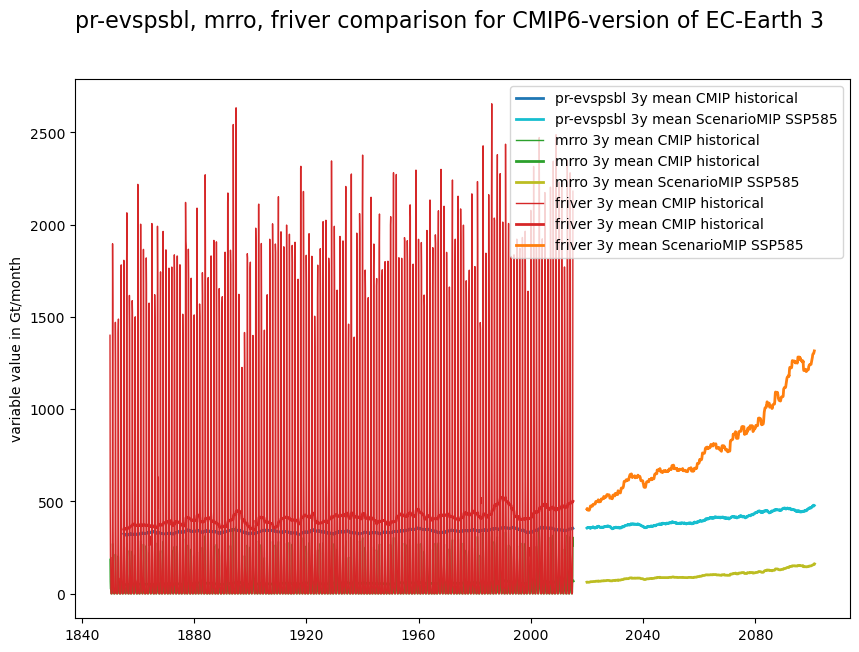

In [24]:
fig = plt.figure(figsize=[10,7])
fig.suptitle('pr-evspsbl, mrro, friver comparison for CMIP6-version of EC-Earth 3', fontsize = 16)
yearmean = 5
#plt.plot(smb_sd_hist_area.time, smb_sd_hist_area.sum(['lat','lon']), linestyle = 'dotted', color = 'tab:blue', label = 'pr-evspsbl 1850-2100')
plt.plot(smb_sd_hist.time, smb_sd_hist.sum(['lat','lon']).rolling(time = 12*yearmean).mean(), linewidth = 2, color = 'tab:blue', label = 'pr-evspsbl 3y mean CMIP historical')

#plt.plot(smb_sd_585_area.time, smb_sd_585_area.sum(['lat','lon']), linestyle = 'dotted', color = 'tab:orange', label = 'pr-evspsbl 1850-2100')
plt.plot(smb_sd_585.time, smb_sd_585.sum(['lat','lon']).rolling(time = 12*yearmean).mean(), linewidth = 2, color = 'tab:cyan', label = 'pr-evspsbl 3y mean ScenarioMIP SSP585')

plt.plot(mrro_sd_hist_processed.time, mrro_sd_hist_processed, linewidth = 1, color = 'tab:green', label = 'mrro 3y mean CMIP historical')
plt.plot(mrro_sd_hist_processed.time, mrro_sd_hist_processed.rolling(time = 12*yearmean).mean(), linewidth = 2, color = 'tab:green', label = 'mrro 3y mean CMIP historical')

#plt.plot(smb_lcic_585_area.time, smb_lcic_585_area.sum(['lat','lon']), linestyle = 'dotted', color = 'tab:red', label = 'pr-evspsbl 1850-2100')
plt.plot(mrro_sd_585_processed.time, mrro_sd_585_processed.rolling(time = 12*yearmean).mean(), linewidth = 2, color = 'tab:olive', label = 'mrro 3y mean ScenarioMIP SSP585')

plt.plot(friver_sd_hist_processed.time, friver_sd_hist_processed, linewidth = 1, color = 'tab:red', label = 'friver 3y mean CMIP historical')
plt.plot(friver_sd_hist_processed.time, friver_sd_hist_processed.rolling(time = 12*yearmean).mean(), linewidth = 2, color = 'tab:red', label = 'friver 3y mean CMIP historical')

#plt.plot(smb_lcic_585_area.time, smb_lcic_585_area.sum(['lat','lon']), linestyle = 'dotted', color = 'tab:red', label = 'pr-evspsbl 1850-2100')
plt.plot(friver_sd_585_processed.time, friver_sd_585_processed.rolling(time = 12*yearmean).mean(), linewidth = 2, color = 'tab:orange', label = 'friver 3y mean ScenarioMIP SSP585')

#xtick_locs= np.arange(0, 250+1, 25)
#tick_years= np.arange(1850, 2100 + 1, 25)
#plt.xticks(xtick_locs, tick_years)
#plt.ylim(0, 1.7e7)
plt.ylabel('variable value in Gt/month')
plt.legend()

plt.show()

Temperature at surface

In [28]:
# standard historical
fn_tas_sd_hist = '/usr/people/ijzerman/GradProject/DataFiles/CMIP6/historical/tas/*.nc'
tas_sd_hist = xr.open_mfdataset(fn_tas_sd_hist)

# standard ssp585
fn_tas_sd_585 = '/usr/people/ijzerman/GradProject/DataFiles/CMIP6/ssp585/tas/*.nc'
tas_sd_585 = xr.open_mfdataset(fn_tas_sd_585)

# 5icu historical
fn_tas_5icu_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/tas/gr/v20230719/*.nc'
tas_5icu_hist = xr.open_mfdataset(fn_tas_5icu_hist)

# 5icu ssp585
fn_tas_5icu_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/5icu/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/tas/gr/v20230720/*.nc'
tas_5icu_585 = xr.open_mfdataset(fn_tas_5icu_585)

# lcic historical
fn_tas_lcic_hist = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/Amon/tas/gr/v20230721/*.nc'
tas_lcic_hist = xr.open_mfdataset(fn_tas_lcic_hist)

# lcic ssp585
fn_tas_lcic_585 = '/net/pc200037/nobackup/users/linden/ecearth-runs/lcic/v001/CMIP6/ScenarioMIP/EC-Earth-Consortium/EC-Earth3/ssp585/r1i1p1f1/Amon/tas/gr/v20230731/*.nc'
tas_lcic_585 = xr.open_mfdataset(fn_tas_lcic_585)

#areacella
fn_aca = '/net/pc200037/nobackup/users/linden/cmip6data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3/historical/r1i1p1f1/fx/areacella/gr/areacella_fx_EC-Earth3_historical_r1i1p1f1_gr.nc'
aca = xr.open_dataset(fn_aca)

#sftlf
fn_sftlf = '/usr/people/ijzerman/GradProject/DataFiles/sftlf.nc'
sftlf = xr.open_dataset(fn_sftlf)

#sftof
fn_sftof = '/usr/people/ijzerman/GradProject/DataFiles/sftof.nc'
sftof = xr.open_dataset(fn_sftof)


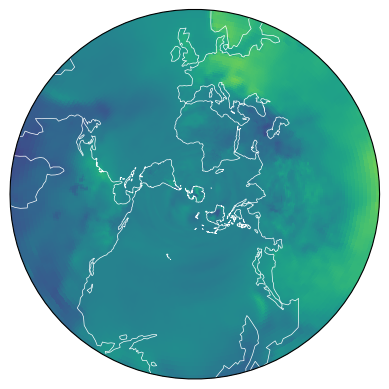

In [ ]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())

im = ax.pcolormesh(tas_sd_hist.lon, tas_sd_hist.lat,
                tas_sd_hist.tas.isel(time=1)-tas_5icu_hist.tas.isel(time=1), 
                transform=ccrs.PlateCarree())
ax.coastlines(color='w', lw =0.5)
# \tas_sd_hist.tas.isel(time=1).plot()  # isel({'time':0})

In [29]:
def tas_data_processer(data, datarangeidx):
    processed_data = (((data.tas.isel(lat=range(0,datarangeidx,1))-273.15).weighted(aca.areacella).mean(['lat','lon'])).groupby('time.year'))
    result = processed_data.mean('time')
    return result

In [30]:
lat = 50
tas_sd_hist_proc = tas_data_processer(tas_sd_hist, lat)
tas_sd_585_proc = tas_data_processer(tas_sd_585, lat)

tas_5icu_hist_proc = tas_data_processer(tas_5icu_hist, lat)
tas_5icu_585_proc = tas_data_processer(tas_5icu_585, lat)

tas_lcic_hist_proc = tas_data_processer(tas_lcic_hist, lat)
tas_lcic_585_proc = tas_data_processer(tas_lcic_585, lat)


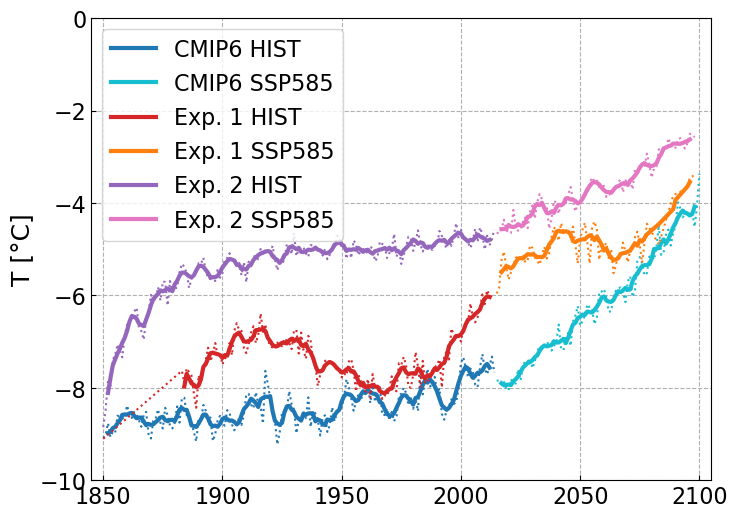

In [33]:
fig = plt.figure(figsize=[8,6])
#fig.suptitle('TAS for different versions of EC-Earth3', fontsize = 16)
yearmean = 5
lw = 3

plt.plot(tas_sd_hist_proc.year, tas_sd_hist_proc, 
        linestyle = 'dotted', color = 'tab:blue') #, label = 'CMIP6 hist.')
plt.plot(tas_sd_hist_proc.year, tas_sd_hist_proc.rolling(year = yearmean, center = True).mean(), 
         linewidth = lw, color = 'tab:blue', label = 'CMIP6 HIST')

plt.plot(tas_sd_585_proc.year, tas_sd_585_proc,
        linestyle = 'dotted', color = 'tab:cyan')#, label = 'CMIP6 SSP585')
plt.plot(tas_sd_585_proc.year, tas_sd_585_proc.rolling(year = yearmean, center = True).mean(), 
         linewidth = lw, color = 'tab:cyan', label = 'CMIP6 SSP585')

####################
plt.plot(tas_5icu_hist_proc.year, tas_5icu_hist_proc, 
        linestyle = 'dotted', color = 'tab:red') #, label = 'ver. 1 hist.')
plt.plot(tas_5icu_hist_proc.year, tas_5icu_hist_proc.rolling(year = yearmean, center = True).mean(), 
         linewidth = lw, color = 'tab:red', label = 'Exp. 1 HIST')

plt.plot(tas_5icu_585_proc.year, tas_5icu_585_proc,
        linestyle = 'dotted', color = 'tab:orange')#, label = '5icu ssp585')
plt.plot(tas_5icu_585_proc.year, tas_5icu_585_proc.rolling(year = yearmean, center = True).mean(), 
         linewidth = lw, color = 'tab:orange', label = 'Exp. 1 SSP585')

####################
plt.plot(tas_lcic_hist_proc.year, tas_lcic_hist_proc, 
        linestyle = 'dotted', color = 'tab:purple')#, label = 'lcic historical')
plt.plot(tas_lcic_hist_proc.year, tas_lcic_hist_proc.rolling(year = yearmean, center = True).mean(), 
         linewidth = lw, color = 'tab:purple', label = 'Exp. 2 HIST')

plt.plot(tas_lcic_585_proc.year, tas_lcic_585_proc, 
        linestyle = 'dotted', color = 'tab:pink') #, label = 'lcic ssp585')
plt.plot(tas_lcic_585_proc.year, tas_lcic_585_proc.rolling(year = yearmean, center = True).mean(), 
         linewidth = lw, color = 'tab:pink', label = 'Exp. 2 SSP585')

#xtick_locs= np.arange(0, 250+1, 25)
#tick_years= np.arange(1850, 2100 + 1, 25)
#plt.xticks(xtick_locs, tick_years)
plt.tick_params(direction = 'in', labelsize = 16)
plt.grid(linestyle = '--')
plt.xlim(1845, 2105)
plt.ylim(-10, 0)
plt.yticks(range(-10, 1, 2))
plt.ylabel('T [°C]', fontsize = 18)
plt.legend(fontsize = 16)

plt.show()